# Modelo Ciclo de Brayton

Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import diagrama_pv, diagrama_ts, LABEL_SIZE, MARKER_SIZE

## Definir funciones
Para la presión de un gas en un proceso isoentrópio (y por lo tanto adiabático), admisión de calor a presión constante y eliminación de calor a volumen constante

### Para diagrama Pv

In [2]:
# Valores dados para que calce con el gráfico
gamma = 1.5

def pressure(v, P0, v0):
    return P0 * np.power(v0/v, gamma)

def volume(P, v0, P0):
    return v0 * np.power(P0/P, 1/gamma)

### Para diagrama TS

In [3]:
c_p = 1

def temperature(S, T0, S0):
    return T0*np.exp((S-S0)/c_p)

def entropy(T, S0, T0):
    return S0 + c_p*np.log(T / T0)

## Valores iniciales

In [4]:
v_a = 1.5
v_b = 1
v_c = 2
P_a = 1

S_a = 1.3
S_d = 2.0
T_a = 200
T_b = 300

## Cálcular otros valores

In [5]:
v_ab = np.linspace(v_a, v_b)
P_ab = pressure(v_ab, P_a, v_a)
P_b = pressure(v_b, P_a, v_a)
P_c = P_b
P_d = P_a
v_d = volume(P_d, v_c, P_c)
v_cd = np.linspace(v_c, v_d)
P_cd = pressure(v_cd, P_c, v_c)

S_b = S_a
S_c = S_d
S_bc = np.linspace(S_b, S_c)
T_bc = temperature(S_bc, T_b, S_b)
T_c = temperature(S_c, T_b, S_b)
S_da = np.linspace(S_d, S_a)
T_da = temperature(S_da, T_a, S_a)
T_d = temperature(S_d, T_a, S_a)

## Graficar

### Diagrama Pv

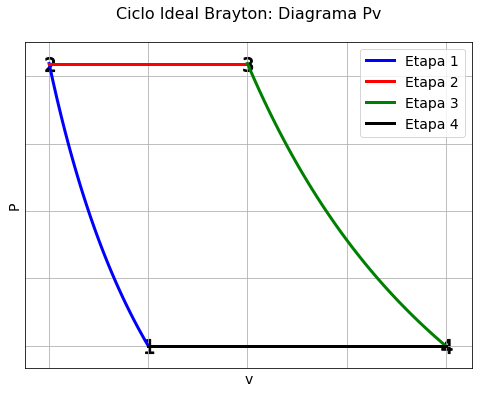

In [6]:
v = [
    v_ab,
    [v_b, v_c],
    v_cd,
    [v_d, v_a]
]
P = [
    P_ab,
    [P_b, P_c],
    P_cd,
    [P_d, P_a]
]

fig, ax = diagrama_pv(v, P, "Ciclo Ideal Brayton", True)

fig.savefig("../Matplotlib/ciclo_brayton_pv.png")

### Diagrama TS

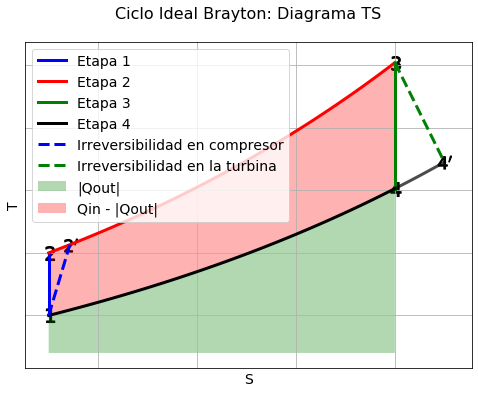

In [7]:
S = [
    [S_a, S_b],
    S_bc,
    [S_c, S_d],
    S_da
]
T = [
    [T_a, T_b],
    T_bc,
    [T_c, T_d],
    T_da
]

fig, ax = diagrama_ts(S, T, "Ciclo Ideal Brayton", True)

# Irreversibilidades

S_b_irr = S_bc[3]
T_b_irr = T_bc[3]
delta_irr = 0.1
S_irr = np.linspace(S_d, S_d + delta_irr)
T_irr = temperature(S_irr, T_d, S_d)

# Graficas
ax.plot([S_a, S_b_irr], [T_a, T_b_irr], '--b', linewidth=3, label="Irreversibilidad en compresor")
ax.plot(S_irr, T_irr, '-k', linewidth=3, alpha=0.7)
ax.plot([S_c, S_irr[-1]], [T_c, T_irr[-1]], '--g', linewidth=3, label="Irreversibilidad en la turbina")
ax.scatter(S_b_irr, T_b_irr, marker='$2\'$', color='k', s=MARKER_SIZE)
ax.scatter(S_irr[-1], T_irr[-1], marker='$4\'$', color='k', s=MARKER_SIZE)

ax.fill_between(S_da, T_a*0.7, T_da, facecolor='g', alpha=0.3, label="|Qout|")
ax.fill_between(S_bc, T_da[::-1], T_bc, facecolor='r', alpha=0.3, label="Qin - |Qout|")

ax.legend(fontsize=LABEL_SIZE)

fig.savefig("../Matplotlib/ciclo_brayton_ts.png")

## Añadiendo Regeneración

### Diagrama TS

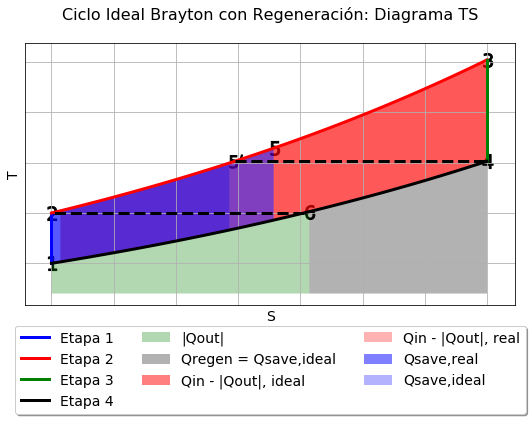

In [8]:
fig, ax = diagrama_ts(S, T, "Ciclo Ideal Brayton con Regeneración", True)

S_e_prima = entropy(T_d, S_b, T_b)
S_f_prima = entropy(T_b, S_d, T_d)

ax.scatter(S_e_prima, T_d, marker='$5\'$', color='k', s=MARKER_SIZE)
ax.plot([S_e_prima, S_d], [T_d, T_d], '--k', linewidth=3)
ax.plot([S_f_prima, S_b], [T_b, T_b], '--k', linewidth=3)

ax.scatter(S_bc[25], T_bc[25], marker='$5$', color='k', s=MARKER_SIZE)
ax.scatter(S_da[20], T_da[20], marker='$6$', color='k', s=MARKER_SIZE)


ax.fill_between(S_da[20:], T_a*0.7, T_da[20:], facecolor='g', alpha=0.3, label="|Qout|")
ax.fill_between(S_da[0:21], T_a*0.7, T_da[0:21], facecolor='k', alpha=0.3, label="Qregen = Qsave,ideal")

T_ad = T_da[::-1]
delT = 100

ax.fill_between(S_bc[T_bc >= T_d - delT], T_ad[T_bc >= T_d - delT], T_bc[T_bc >= T_d - delT], facecolor='r',
                alpha=0.5, label="Qin - |Qout|, ideal")
ax.fill_between(S_bc[25:], T_ad[25:], T_bc[25:], facecolor='r',
                alpha=0.3, label="Qin - |Qout|, real")
ax.fill_between(S_bc[0:26], T_ad[0:26], T_bc[0:26], facecolor='b', alpha=0.5, label="Qsave,real")
ax.fill_between(S_bc[T_bc <= T_d], T_ad[T_bc <= T_d], T_bc[T_bc <= T_d], facecolor='b',
                alpha=0.3, label="Qsave,ideal")

ax.legend(fontsize=LABEL_SIZE, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          ncol=3, fancybox=True, shadow=True)
fig.tight_layout()

fig.savefig("../Matplotlib/ciclo_brayton_regen_ts.png")

## Añadiendo inter-enfriamiento

### Diagrama Pv

#### Funciones

In [9]:
n = 1.5
R = 1.0

def pressure_poli(v, P0, v0):
    return P0*np.power(v0/v, n)

def volume_poli(P, v0, P0):
    return v0*np.power(P0/P, 1/n)

def pressure_isoterma(v, T):
    return R*T / v

#### Valores

Definir valores para que calcen con el gráfico

In [10]:
v_a = 10
v_b = 6
v_d = 3
P_a = 1000

Tiso = P_a * v_a
P_b = pressure_poli(v_b, P_a, v_a)
P_c = P_b
v_c = R * Tiso / P_c

#### Realizar cálculos

In [11]:
v_ab = np.linspace(v_a, v_b)
P_ab = pressure_poli(v_ab, P_a, v_a)
v_cd = np.linspace(v_c, v_d)
P_cd = pressure_poli(v_cd, P_c, v_c)
P_d = pressure_poli(v_d, P_c, v_c)

#### Isoterma

La isoterma debe tocar los puntos A y C

In [12]:
v = [
    v_ab,
    [v_b, v_c],
    v_cd,
    [v_d]
]
P = [
    P_ab,
    [P_b, P_c],
    P_cd,
    [P_d]
]

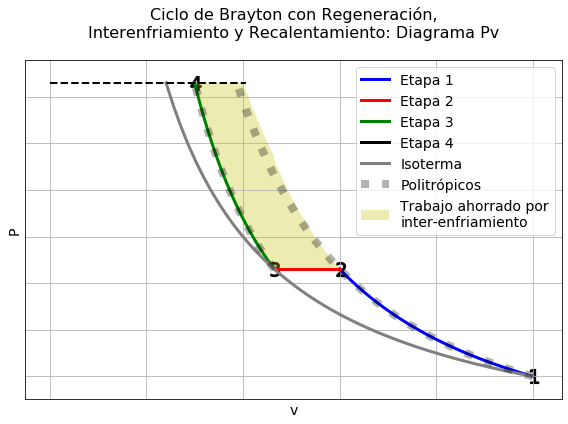

In [13]:
fig, ax = diagrama_pv(v, P, "Ciclo de Brayton con Regeneración,\nInterenfriamiento y Recalentamiento", True)

v_iso = np.linspace(v_a, Tiso * R/ P_d)
ax.plot(v_iso, pressure_isoterma(v_iso, Tiso), label="Isoterma", color="gray", linewidth=3)
ax.plot(v_cd, P_cd, ":", label="Politrópicos", color="k", linewidth=8, alpha=0.3)


v_poli = np.linspace(v_a, volume_poli(P_d, v_a, P_a))
P_poli = pressure_poli(v_poli, P_a, v_a)

ax.plot(v_poli, P_poli, ":", color="k", linewidth=8, alpha=0.3)

ax.plot([0, v_poli[-1]+0.2], [P_d, P_d], "--k", linewidth=2)

v_bc = np.linspace(v_b, v_c)

proportion = 70
v_poli = np.linspace(v_b, volume_poli(P_d, v_a, P_a), proportion)
P_poli = pressure_poli(v_poli, P_a, v_a)

ax.fill_between(list(v_bc) + list(v_cd),
                [P_c]*50 + list(P_cd),
                list(P_poli) + [P_d]*(100 - proportion),
                facecolor="y", alpha=0.3, label="Trabajo ahorrado por\ninter-enfriamiento")

ax.legend(fontsize=LABEL_SIZE)

fig.tight_layout()

fig.savefig("../Matplotlib/ciclo_brayton_regen_enfr_pv.png")

### Diagrama TS

In [14]:
S_ab, S_gh, S_hi, S_ia = S
T_ab, T_gh, T_hi, T_ia = T

In [15]:
S_b = S_ab[-1]
T_b = T_ab[-1]
T_a = T_ab[0]
T_c = T_a
S_c = entropy(T_c, S_b, T_b)

S_bc = np.linspace(S_b, S_c)
T_bc = temperature(S_bc, T_b, S_b)

S_d = S_c
T_d = T_b

T_h = T_hi[0]
T_i = T_hi[-1]
S_h = S_hi[0]
T_f = T_h
T_g = T_i
S_g = entropy(T_g, S_h, T_h)
S_gh = np.linspace(S_g, S_h)
T_gh = temperature(S_gh, T_g, S_g)

S_f = S_g

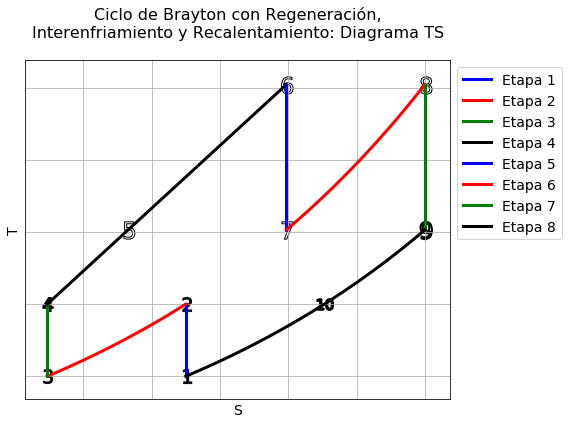

In [16]:
fig, ax = diagrama_ts([S_ab, S_bc, [S_c, S_d], [S_d, S_f]],
                 [T_ab, T_bc, [T_c, T_d], [T_d, T_f]],
                 "Ciclo de Brayton con Regeneración,\nInterenfriamiento y Recalentamiento", True)

ax.plot([S_f, S_g], [T_f, T_g], color="b", linewidth=3, label="Etapa 5")
ax.plot(S_gh, T_gh, color="r", linewidth=3, label="Etapa 6")
ax.plot(S_hi, T_hi, color="g", linewidth=3, label="Etapa 7")
ax.plot(S_ia, T_ia, color="k", linewidth=3, label="Etapa 8")

T_e = T_i

m_df = (T_f - T_d) / (S_f - S_d)

n_df = T_f - (m_df * S_f)

S_e = (T_e - n_df) / m_df

ax.scatter(S_e, T_e, marker='$5$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=1)
ax.scatter(S_f, T_f, marker='$6$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=1)
ax.scatter(S_g, T_g, marker='$7$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=1)
ax.scatter(S_h, T_h, marker='$8$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=1)
S_i = S_hi[-1]
T_i = T_hi[-1]
ax.scatter(S_i, T_i, marker='$9$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=2)
T_j = T_b
S_j = entropy(T_j, S_a, T_a)
ax.scatter(S_j, T_j, marker='$10$', edgecolors='k', facecolor='w', s=1.5*MARKER_SIZE, linewidths=2)

ax.legend(fontsize=LABEL_SIZE, bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()

fig.savefig("../Matplotlib/ciclo_brayton_regen_enfr_ts.png")